Techniques used:<br>
    1. gammatransform<br>
    2. histMatch<br>
    3. HistEqual<br>
    4. linearContrast Strech<br>

In [1]:
# Load necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas
%matplotlib inline

In [2]:
n1 = cv2.imread("../images/neville1.jpg")
n1 = cv2.cvtColor(n1,cv2.COLOR_BGR2GRAY)
n2 = cv2.imread("../images/neville2.jpg")
n2 = cv2.cvtColor(n2,cv2.COLOR_BGR2GRAY)
n3 = cv2.imread("../images/neville3.jpg")
n3 = cv2.cvtColor(n3,cv2.COLOR_BGR2GRAY)
n4 = cv2.imread("../images/neville4.jpg")
n4 = cv2.cvtColor(n4,cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'n4')

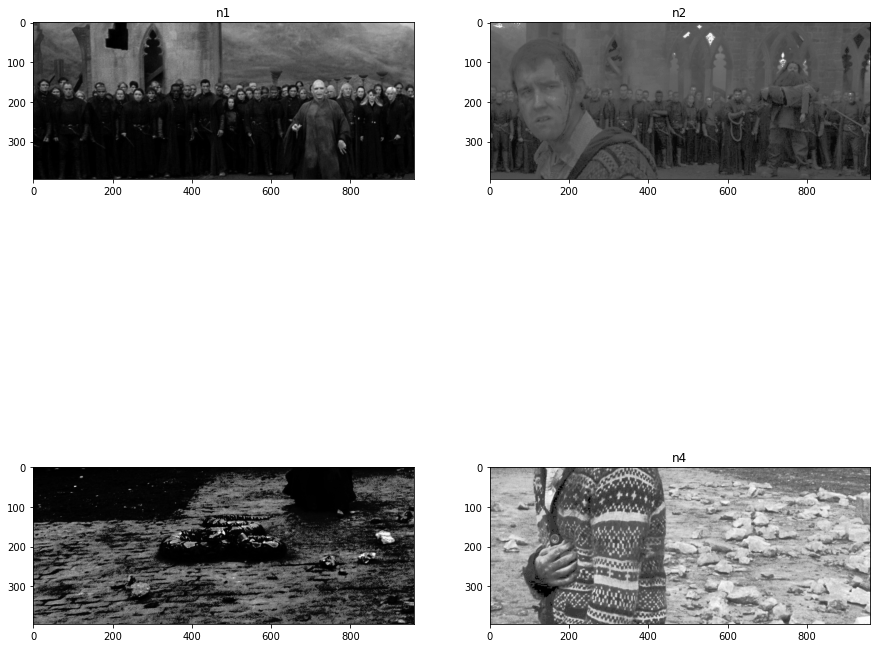

In [3]:
fig,axs = plt.subplots(2,2,figsize=(15,15))
axs[0,0].imshow(n1,cmap='gray')
axs[0,0].set_title("n1")
axs[0,1].imshow(n3,cmap='gray')
axs[0,1].set_title("n3")
axs[1,0].imshow(n2,cmap='gray')
axs[0,1].set_title("n2")
axs[1,1].imshow(n4,cmap='gray')
axs[1,1].set_title("n4")

In [4]:
def drawHistogram(img):
    imgC = np.copy(img)
    imgC = imgC.ravel()
    his = np.zeros(256)
    for i in imgC:
        his[i] = his[i] + 1
    return his 

Text(0.5, 1.0, 'n4')

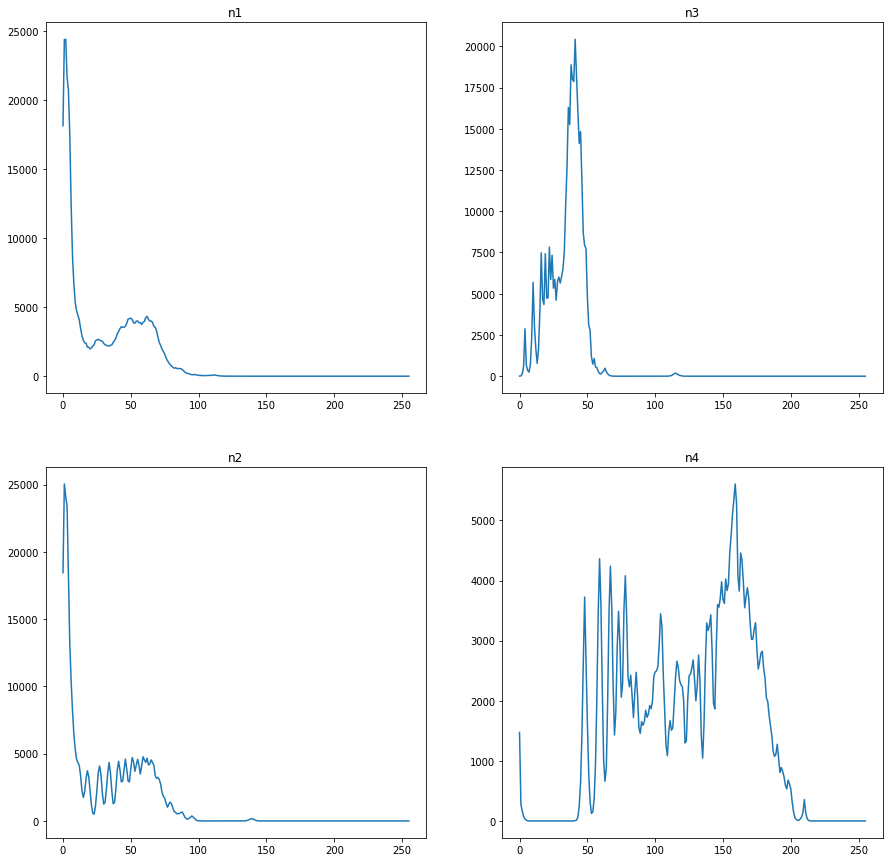

In [5]:
histg1 = drawHistogram(n1)
histg2 = drawHistogram(n2)
histg3 = drawHistogram(n3)
histg4 = drawHistogram(n4)
# show the plotting graph of an image
fig,axs = plt.subplots(2,2,figsize=(15,15))
axs[0,0].plot(histg1)
axs[0,0].set_title("n1")
axs[0,1].plot(histg3)
axs[0,1].set_title("n3")
axs[1,0].plot(histg2)
axs[1,0].set_title("n2")
axs[1,1].plot(histg4)
axs[1,1].set_title("n4")

In [6]:
def combineImg(img1,img2,img3,img4):
    #Take clockwise arrangement from img1 to img4 so n1,n3,n4,n2
    top = np.concatenate((img1,img3),axis=1)
    bottom = np.concatenate((img2,img4), axis=1)
    full = np.concatenate((top,bottom),axis=0)
    return full

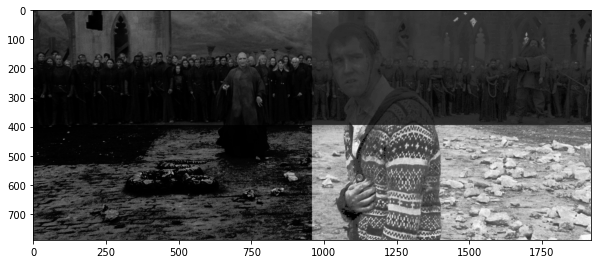

In [7]:
fullInitial = combineImg(n1,n2,n3,n4)
fig = plt.figure(figsize=(10,10))
plt.imshow(fullInitial,cmap='gray')

In [8]:
def gammaTransform(gamma,image):
    maximum = np.max(image)
    minimum = np.min(image)
    imgNorm = (np.array(image)-minimum)/(maximum - minimum)
    trans = imgNorm ** gamma
    out = np.array(trans)*255
    return out.astype('uint8')

In [9]:
def histEqualization(img):
    #Make a histogram which contains the intensity 

    histogram = np.zeros((256,), dtype=int)
    #print(histogram.shape)
    flatten = np.ravel(img)

    for i in flatten:
        histogram[i] += 1
    # print(histogram)
    TotalPixels = np.sum(histogram)
    # print(TotalPixels)
    # Find CDF
    for i in range(255):
        histogram[i+1] += histogram[i]
    histogramNorm = (histogram - histogram.min())*255
    Max = TotalPixels - histogram.min()
    histI = (histogramNorm/Max).astype('uint8')

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row][col] = histI[img[row][col]]
    return img

In [10]:
# Linear Contrast
def linContrastStretching(img,a,b):
    aMax = np.amax(img, axis=None)
    aMin = np.amin(img, axis=None)
    imgContrast = np.round(((((img - aMin)/(aMax - aMin)) * (b-a)) + a),decimals=0).astype(np.uint8)
    return imgContrast

In [11]:
def histMatching(img,ref):
    histImg = drawHistogram(img)

    cdfImg = np.zeros(256)
    # Normalizing the histogram to a probability density function

    pdfImg = histImg/(img.shape[0]*img.shape[1])

    # Calculating the CDF to perform histogram equilization

    cdfImg[0] = pdfImg[0]

    for i in range(1,256):
        cdfImg[i]=cdfImg[i-1]+pdfImg[i]

    ###################################################
    #Make a histogram which contains the intensity of reference image
    histRef = cv2.calcHist([ref],[0],None,[256],[0,256])

    cdfRef = np.zeros(256)
    # Normalizing the histogram to a probability density function

    pdfRef = histRef/(ref.shape[0]*ref.shape[1])

    # Calculating the CDF to perform histogram equilization

    cdfRef[0] = pdfRef[0]

    for i in range(1,256):
        cdfRef[i]=cdfRef[i-1]+pdfRef[i]

    imgT = np.floor(cdfImg*255)
    refT = np.floor(cdfRef*255)
    inv = np.zeros_like(cdfRef)
    out = np.zeros_like(img)
    for i in range(256):
        val = np.abs(cdfRef-cdfImg[i])
        test = val.argmin()
        inv[i] = test
    
#     print(inv)
#     print(inv.shape)
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row][col] = inv[img[row][col]]
    return img

In [12]:
n1_n = histMatching(n1,n4)
n3_n = histMatching(n3,n4)
n1_n = histMatching(n1_n,n3_n)
n1_n = gammaTransform(1.45,n1_n)
n3_n = gammaTransform(2.02,n3_n)

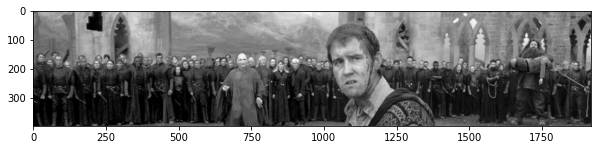

In [13]:
top = np.concatenate((n1_n,n3_n),axis=1)
fig = plt.figure(figsize=(10,10))
plt.imshow(top,cmap='gray')
niceTop = np.copy(top)

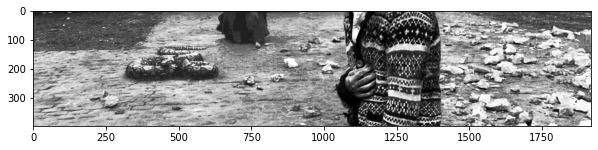

In [14]:
n2_n = histEqualization(n2)
n2_n = histMatching(n2_n,n4)
n2_n = linContrastStretching(n2_n,20,256)
n2_n = gammaTransform(0.8,n2_n)
n4_n = histEqualization(n4)
n4_n = gammaTransform(1,n4_n)
bottom = np.concatenate((n2_n,n4_n), axis=1)
fig = plt.figure(figsize=(10,10))
plt.imshow(bottom,cmap='gray')

In [15]:
nnBot = np.copy(bottom)
# fig = plt.figure(figsize=(200,200))
# plt.imshow(nnBot,cmap='gray')
niceBottom = np.copy(nnBot)

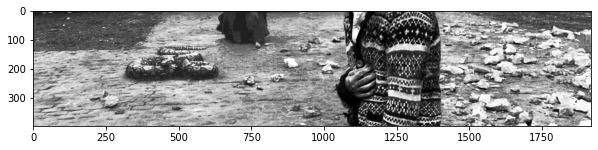

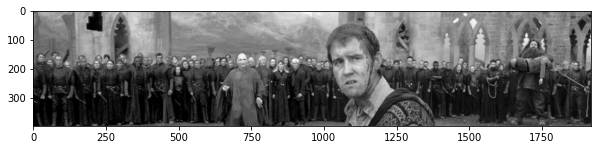

In [16]:
fig = plt.figure(figsize=(10,10))
plt.imshow(niceBottom,cmap='gray')
plt.show()
fig = plt.figure(figsize=(10,10))
plt.imshow(niceTop,cmap='gray')
plt.show()

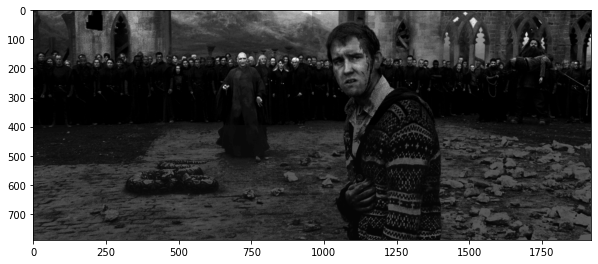

In [17]:
nB = np.copy(niceBottom)
nT = np.copy(niceTop)
nB = gammaTransform(1.5,nB)
nB = linContrastStretching(nB,5,90)
nT = linContrastStretching(nT,0,150)
nT = gammaTransform(2.5,nT)
# nT = linContrastStretching(nT,10,150)
tb = np.concatenate((nT,nB),axis=0)
fig = plt.figure(figsize=(10,10))
plt.imshow(tb,cmap='gray')
# cv2.imwrite("c.jpg",tb)

Text(0.5, 1.0, 'Overall')

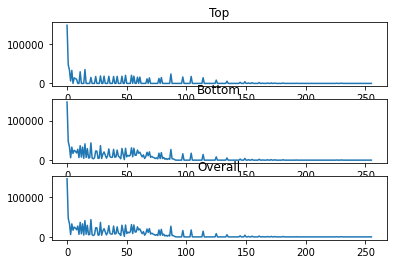

In [18]:
histg1 = drawHistogram(nT)
histg2 = drawHistogram(nB)
histg3 = drawHistogram(tb)
fig,axs = plt.subplots(3,1)
axs[0].plot(histg1)
axs[0].set_title("Top")
axs[1].plot(histg3)
axs[1].set_title("Bottom")
axs[2].plot(histg3)
axs[2].set_title("Overall")